>Authors:
>
> - Zofia Agata Lenarczyk s242916


This notebook contains the assignment 1 for the course Social Graphs and Interactions 2025.

The content of this notebook focuses on the topic of random network theory in regard to the characteristics of real networks. It looks into the Wats-Strogatz Model and the Barabasi-Albert model. In the second part of the notebook we discuss the Rock Music Network built from the Wikipedia list of Rock performers.

In [2]:
# imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Assignment 1.1 

#### **Questions based on chapters 3.5-3.10** from Network Science by Albert-Laszlo Barabasi

> **Q**: What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

> **A**: Random networks assume that the range of the degrees of the nodes is in the vicinity of the average degree. In such case, there cannot be any outliers or nodes with particularly large amount of links, which is so often a case in real networks. 
>
> This issue is well visualized by the plot of the probability of degree $k$ in the function of $k$ - ($p_k(k)$) with both plots of the data and the poisson distribution of the random network (Image 3.6 in the book Network Science by Albert-Laszlo Barabasi). The real degrees are distributed along the different values of $k$, with numerous nodes having relatively high $k$ and low $k$. Whereas the poisson distribution (degree distribution of random networks) has its peak around the average degree and it sharply drops for the more radical values.

> **Q**: List the four regimes that characterize random networks as a function of $\langle k \rangle$.

> **A**: Random networks regimes dependent on the average degree differentiate networks by their charcteristics of the network topology. They are as follows:
>    - Subcritical Regime for $k < 1$.
> The network consists of many tiny components.
>    - Critical Point for $k = 1$.
> Until $k = 1$ the network contained only components of different sizes, but there was no giant component. The value $k = 1$ is a value that > > differentiates networks containing a giant component and not.
>    - Supercritical Regime for $k > 1$ and $k < lnN$.
>   There are no isolated nodes, the giant component consists of most of the nodes in the network, but there are still a few of tiny components > present.
>    - Connected Regime for $k > lnN$. 
> All nodes are a part of the giant component, for $k = N-1$ the network becomes a complete graph.

> **Q**: According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

> **A**: Decreasing of the local cluster coefficient with increasing degree of the node (k) cannot be explained by the local clustering coefficient equation $C_i = \langle k \rangle/N$ (equation 3.21 from Network Science by Albert-Laszlo Barabasi), that says nothing about the actual degree of the node, only about being proportional to the average degree of its neighbours. This behaviour of real networks is problematic for modelling them with random networks, as the random network mathematical theory does not expect such a pattern.

#### **Wats-Strogatz Model**

The Wats-Strogatz model combines the small world property of random networks and a high clustering coefficient even for large number of nodes. The small world phenomenon exists when two arbitrary nodes in the network have a relatively short path length. The high clustering coefficient of large networks is one of the issues posed by random networks mathematical models. 

First, to explore the behaviour and properties of the Wats-Strogatz model we created 3 Wats-Strogatz graphs with 500 nodes, average degree $\langle k \rangle$ = 4 and the rewiring probabilities $p = [0, 0.1, 1]$.

In [3]:
# params
num = 3
N = 500
k = 4
p = [0, 0.1, 1]

# create a list of graphs with the params above
Graphs = [nx.watts_strogatz_graph(N, k, p[i]) for i in range(num)]

In [4]:
# calculate average shortest path length for every graph
avg_d = [nx.average_shortest_path_length(G) for G in Graphs]
avg_d

[62.875751503006015, 7.698557114228457, 4.761194388777555]

When the rewiring probability (introducing randomness) is high ($p = 1$), the average distance between nodes drops, as we get closer to a completely random network, where the distance is proprotional to $lnN$. Whereas in networks with low randomness (so called lattices, so 1D, 2D, ... structures) the degree is proportional to $N^{(1/D)}$, where D is dimension (so the degree is smaller and so the distance between nodes is way higher). 

Introducing randomness to the network we introduce the small world phenomenon.

As a next step, we generated 100 networks with the rewiring probabilities ranging from 0 to 1 and calculated the average shorthest path length for each of them

In [ ]:
num = 100
p = np.linspace(0, 1, 100)
Graphs = [nx.watts_strogatz_graph(N, k, p[i]) for i in range(num)]
avg_d = [nx.average_shortest_path_length(G) for G in Graphs]
avg_d_p_dict = {p[i]:avg_d[i] for i in range(num)}
print(avg_d_p_dict[0])
print(avg_d_p_dict[1]) # printed edge values to know the approximate range of values

12.878787878787879


3.4656565656565657

In a fully random network the average shorthest path length is calculated with the equation $\langle d \rangle = lnN/ln\langle k \rangle$ (equation 3.19 from Network Science by Albert-Laszlo Barabasi)

In [21]:
# average shorthest path length in a fully randomized network
d_random = np.log(N)/np.log(k)
d_random

np.float64(4.4828921423310435)

In [22]:
# here we search for a network that has the value of average shorthest path length closest to a fully random network
temp_diff = 100     # relatively large value selected by printing the values of the variable avg_d_p_dict
for key, val in avg_d_p_dict.items():
    diff = np.abs(d_random - val)
    if diff < temp_diff:
        temp_diff = diff
        final_p = key
    else:
        continue
print(f'The network with the rewiring probability p = {final_p:.3f} has the value of average shorthest path length closest to a fully random network.')

The network with the rewiring probability p = 0.848 has the value of average shorthest path length closest to a fully random network.


As expected, a network with the value of $p$ close to 1 has the value of average shorthest path length closest to the one in a fully randomized network. It is expected, because rewiring probability equal to 1 means we introduce a full randomness to the network, therefore the network is random.

To understand this behaviour better, we generated 50 networks with 500 nodes and the average degree $k = 4$ for every of the randomness probabilities from the set: $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$.

In [23]:
num = 50
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
Graphs = [[nx.watts_strogatz_graph(N, k, j) for i in range(num)] for j in p]
np.shape(Graphs) # checked the shape for further usage of the variable Graphs

(6, 50, 500)

In [24]:
# calculate the shorthest paths of every network, then calculate the mean and standard deviation of the networks for each probability p
avg_d = [[nx.average_shortest_path_length(Graphs[i][j]) for j in range(num)] for i in range(len(p))]
avg_d_for_p = [np.mean(avg_d[i]) for i in range(len(p))]
avg_d_std = [np.std(avg_d[i]) for i in range(len(p))]

<function matplotlib.pyplot.show(close=None, block=None)>

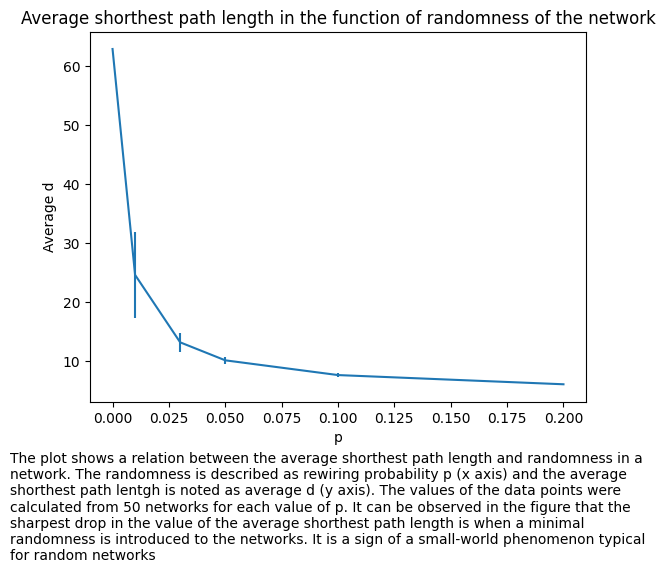

In [25]:
# plot of the average shorthest path length in the function of probability p
plt.errorbar(p, avg_d_for_p, avg_d_std)
plt.ylabel("Average d")
plt.xlabel("p")
plt.title("Average shorthest path length in the function of randomness of the network")
txt = "The plot shows a relation between the average shorthest path length and randomness in a network. " \
"The randomness is described as rewiring probability p (x axis) and the average shorthest path lentgh is noted as average d (y axis). " \
"The values of the data points were calculated from 50 networks for each value of p. " \
"It can be observed in the figure that the sharpest drop in the value of the average shorthest path length " \
"is when a minimal randomness is introduced to the networks. It is a sign of a small-world phenomenon typical for random networks"
plt.figtext(0, -0.11, txt, wrap = True, verticalalignment='center')
plt.show

#### **Questions based on chapter 4 and 5** from Network Science by Albert-Laszlo Barabasi

> **Q**:  What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You
will have to skim chp 4.7 to answer this one).

> **A**: The three regimes dependent on the degree exponent describe the relationship between the presence of hubs and the small world property (short path lengths between nodes). They are as follows:
>    - Anomalous Regime for $γ < 2$. The maximal degree grows faster than number of nodes, so no network can exist in this regime.
>    - Scale-free Regime (ultra-small world) for $2 < γ < 3$. Networks have many smaller hubs, so actually the distances in this network are very short due to many shortcuts created by the hubs.
>    - Random Network (small world) for $γ > 3$. Networks have properties of a random network. Hubs can be present in a network, but they are not large enough to significantly shorten the paths between the nodes. To be able to prove the scale-free nature of such networks, we need to have degrees in range of at least two orders of magnitude (equation 4.23 from Network Science by ALbert-Laszlo Barabasi).

> **Q**: What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

> **A**: The three rigmes in non-linear preferential attachment differentiate how preferential attachment impacts network's growth. They are as follows:
>   - Sublinear Regime for $0 < α < 1$. The degree distribution of networks in this regime is not defined by the power law typical for scale-free networks. It can be modelled as a stretched exponential function, therefore the networks have fewer ans smaller hubs. 
>   - Linear Regime for $α = 1$. A Barabasi-Albert model of a scale-free network with numerous large hubs.
>   - Superlinear Regime for $α > 1$. Very few early nodes become super hubs, as the nodes with a high degree are strongly preferred by the new nodes.
> 

#### **Barabasi-Albert Model**

In the last part of assignment 1.1 we created a Barabasi-Albert model that implements both growth and preferential attachment characteristics of the development of real networks (scale-free with large hubs)

In [26]:
# create a graph and initiate by adding the first node
G = nx.Graph()
G.add_edge(0, 1) # first edge

"""
here we take a list of all edges and flatten it so it's just a list of all nodes with repetitions, 
this way we ensure that when we draw randomly from this list the nodes that already have higher degree
(are repeated in the list) will have higher probability of being drawn)
"""
N = 100
for n in range(2, N + 1):
    edges = list(G.edges)
    flat_edges = [node for pair in edges for node in pair]
    new_node = np.random.choice(flat_edges)
    G.add_edge(n, new_node)

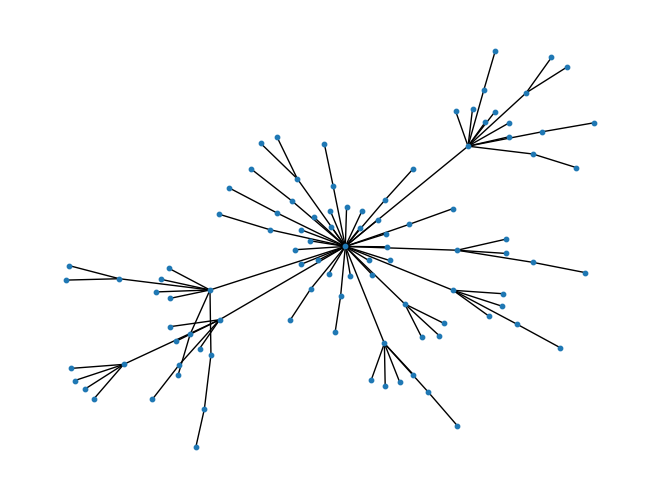

In [27]:
nx.draw(G, node_size=10)

In [28]:
# we increase the size of the network to N=5000 building on the first network and using the same algorithm
N2 = 5000
for n in range(101, N2 + 1):
    edges = list(G.edges)
    flat_edges = [node for pair in edges for node in pair]
    new_node = np.random.choice(flat_edges)
    G.add_edge(n, new_node)

In [29]:
# calculate the maximum and minimum degree in the network
G_degrees = list(dict(G.degree).values())
max_deg = np.max(G_degrees)
min_deg = np.min(G_degrees)

print(f'Maximum degree is {max_deg}. Minimum degree is {min_deg}.')

Maximum degree is 265. Minimum degree is 1.


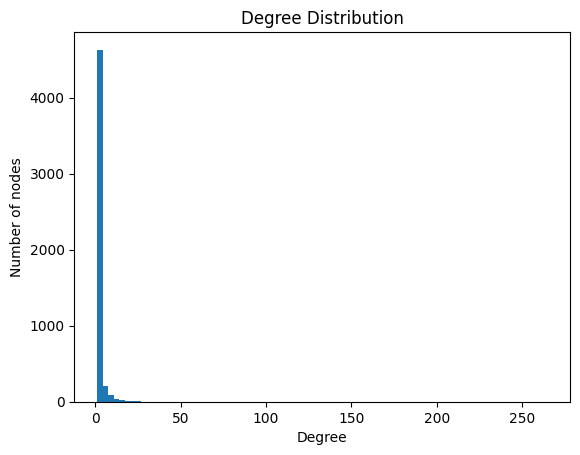

In [30]:
# histogram of the degrees in the network
hist, bin_edges = np.histogram(G_degrees, 81)  # the number of bins equal 81 was determined as len(hist) after the first run of this line of code
plt.hist(bin_edges[:-1], bin_edges, weights=hist)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

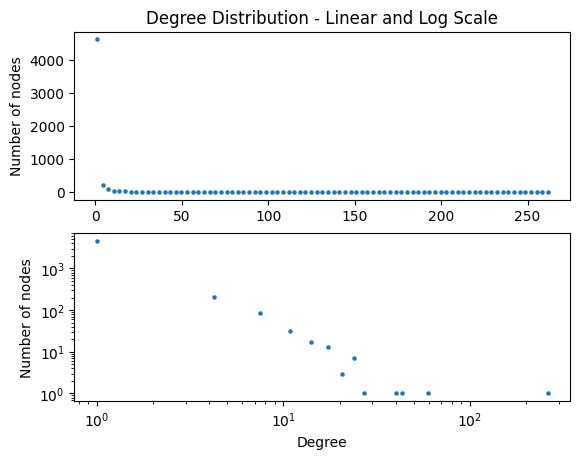

In [ ]:
# degree distribution on linear and logarithmic scale
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title("Degree Distribution - Linear and Log Scale")
ax1.scatter(bin_edges[:-1], hist, s=5)
ax1.set_ylabel("Number of nodes")
ax2.scatter(bin_edges[:-1], hist, s=5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Number of nodes")
ax2.set_xlabel("Degree")
plt.show()

The built network displays characteristics typical for a scale-free network. As visible in the plot of the degree distribution, it consists of nodes with quite diverse degree values, meaning large hubs are also present in the network.

### Assignment 1.2

In [32]:
# add here assignment 1.2

> #### Contributions:
> - s242916 - Assignment 1.1